### 한글폰트 깨짐 방지

In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

In [51]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.1
설치 위치:  C:\Users\Rstudio\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Rstudio\.matplotlib
캐시 위치:  C:\Users\Rstudio\.matplotlib


In [52]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\Rstudio\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [56]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

# 시작

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [64]:
directory = 'C:/Users/Rstudio/Desktop/Bigcon2020/20S_Bigcon'

In [62]:
X_df=pd.read_excel(directory+'/X0820.xlsx') 

In [45]:
X = X_df.copy() ; X

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균방송분,...,상품군power,CPI,CSI,RS,PrimeTime,남성상품,여성상품,무이자,일시불,유명기업/브랜드
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,10.0,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,10.0,...,26.41,0.8,97.5,139.3,0,0,1,0,0,0
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,10.0,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,10.0,...,26.41,0.8,97.5,139.3,0,0,1,0,0,0
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,10.0,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,35374,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,5.0,...,19.40,0.7,100.5,138.0,0,0,0,0,1,1
35375,35375,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,5.0,...,19.40,1.5,104.2,131.7,0,0,0,1,0,1
35376,35376,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,5.0,...,19.40,1.5,104.2,131.7,0,0,0,0,1,1
35377,35377,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,5.0,...,19.40,1.5,104.2,131.7,0,0,0,1,0,1


In [6]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균방송분,겹치는수,...,상품군power,CPI,CSI,RS,PrimeTime,남성상품,여성상품,무이자,일시불,유명기업/브랜드
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,10.0,1,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,10.0,1,...,26.41,0.8,97.5,139.3,0,0,1,0,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,10.0,2,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,10.0,2,...,26.41,0.8,97.5,139.3,0,0,1,0,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,10.0,3,...,26.41,0.8,97.5,139.3,0,1,0,0,0,0


### 노출(분)

In [11]:
x1 = X.iloc[:,1]
y = X.iloc[:,7]
x1.head()

0    20.0
1    20.0
2    20.0
3    20.0
4    20.0
Name: 노출(분), dtype: float64

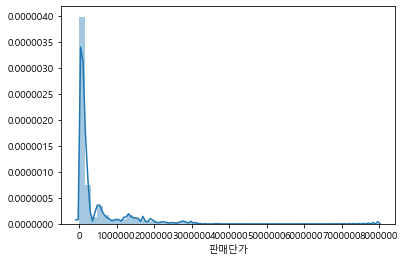

In [57]:
# 노출(분) 분포
sns.distplot(x1)

Text(0, 0.5, '취급액')

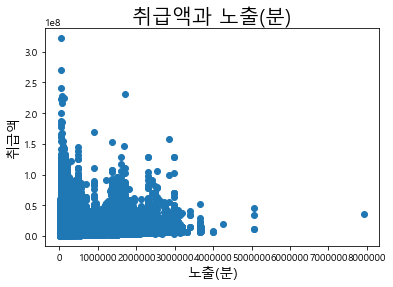

In [58]:
# 취급액과의 분포
plt.plot(x1,y,linestyle='none', marker='o')
plt.title('취급액과 노출(분)', fontsize=20)
plt.xlabel('노출(분)', fontsize=14)
plt.ylabel('취급액', fontsize=14)

### 농수축 소분류

In [105]:
Z_df=pd.read_excel(directory+'/농수축소분류.xlsx') 

In [106]:
Z = Z_df.copy() ; Z

,상품명,식품군,판매단가,취급액,노출(분),판매개수,분당판매개수,분당취급액
0,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,14113000,20.0,231.740558,11.587028,705650.0
1,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,32395000,20.0,531.937603,26.596880,1619750.0
2,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,39669000,20.0,651.379310,32.568966,1983450.0
3,국내산 손질갑오징어 8팩,어류,49900,60787000,20.0,1218.176353,60.908818,3039350.0
4,국내산 손질갑오징어 8팩,어류,49900,115457000,20.0,2313.767535,115.688377,5772850.0
...,...,...,...,...,...,...,...,...
3879,안동간고등어 20팩,어류,30900,54879000,20.0,1776.019417,88.800971,2743950.0
3880,안동간고등어 20팩,어류,30900,63460000,20.0,2053.721683,102.686084,3173000.0
3881,제주갈치+참조기세트,어류,49900,34001000,20.0,681.382766,34.069138,1700050.0
3882,제주갈치+참조기세트,어류,49900,54234000,20.0,1086.853707,54.342685,2711700.0


#### 소분류별 빈도

In [115]:
lst = list(Z["식품군"])
lst.count('육류')

822

In [118]:
lst = list(Z["식품군"])
x = [lst.count('곡류'),lst.count('과일'),lst.count('기타'),lst.count('김치'),lst.count('다시팩'),lst.count('당류'),lst.count('어류'),lst.count('육류'),lst.count('음료'),lst.count('장류'),lst.count('조미료'),lst.count('주전부리'),lst.count('채소')]
label = ['곡류','과일','기타','김치','다시팩','당류','어류','육류','음료','장류','조미료','주전부리','채소']
index = np.arange(len(label))
x

[262, 51, 12, 285, 36, 13, 1934, 822, 137, 57, 6, 242, 27]

([<matplotlib.axis.XTick at 0x22742df2808>,
 <a list of 13 Text xticklabel objects>)

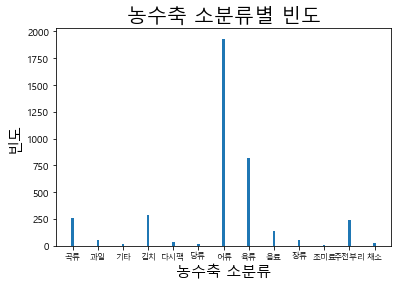

In [119]:
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 빈도', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('빈도', fontsize=15)
plt.xticks(index, label, fontsize=8)

어류가 엄청 많고 그 다음에 육류, 곡류가 많다

#### 분당 판매개수

In [107]:
x = Z.groupby('식품군').분당판매개수.mean()
label = ['곡류','과일','기타','김치','다시팩','당류','어류','육류','음료','장류','조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
곡류      39.751000
과일      34.782181
기타      23.616738
김치      49.074543
다시팩     45.622523
당류      22.624952
어류      56.418888
육류      41.110194
음료      81.873178
장류      23.120824
조미료     17.906646
주전부리    40.792543
채소      64.806557
Name: 분당판매개수, dtype: float64

([<matplotlib.axis.XTick at 0x227415e15c8>,
 <a list of 13 Text xticklabel objects>)

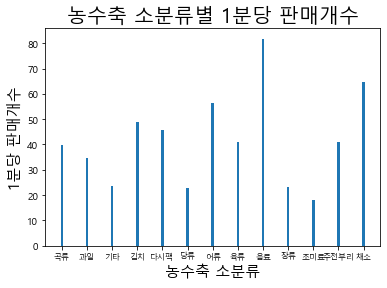

In [108]:
# 1분당 판매개수
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 판매개수', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 판매개수', fontsize=15)
plt.xticks(index, label, fontsize=8)

의외로 음료가 1분당 가장 많이 팔린다. 혹시 다른 거에 비해 단가가 싸서 사람들이 비교적 구매 결정을 쉽게 내리는 것 아닐까...?

#### 판매액 평균

In [120]:
x = Z.groupby('식품군').판매단가.mean()
label = ['곡류','과일','기타','김치','다시팩','당류','어류','육류','음료','장류','조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
곡류      60257.251908
과일      41586.274510
기타      45150.000000
김치      39135.087719
다시팩     42233.333333
당류      59900.000000
어류      43753.671148
육류      53548.418491
음료      32389.051095
장류      96157.894737
조미료     69900.000000
주전부리    35352.892562
채소      31900.000000
Name: 판매단가, dtype: float64

([<matplotlib.axis.XTick at 0x22742eebc88>,
 <a list of 13 Text xticklabel objects>)

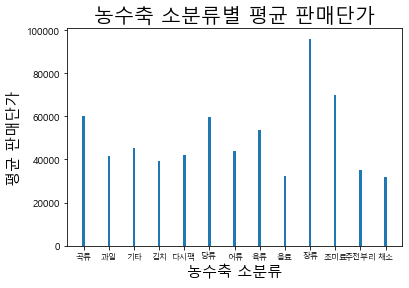

In [121]:
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 평균 판매단가', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('평균 판매단가', fontsize=15)
plt.xticks(index, label, fontsize=8)

장류는 메주가 다다. 메주 비싸다

#### 분당 취급액 평균

In [109]:
x = Z.groupby('식품군').분당취급액.mean()
label = ['곡류','과일','기타','김치','다시팩','당류','어류','육류','음료','장류','조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
곡류      2.395227e+06
과일      1.422161e+06
기타      9.077917e+05
김치      1.915948e+06
다시팩     1.889410e+06
당류      1.355235e+06
어류      2.334360e+06
육류      2.169490e+06
음료      2.560665e+06
장류      2.223729e+06
조미료     1.256567e+06
주전부리    1.394583e+06
채소      2.028274e+06
Name: 분당취급액, dtype: float64

([<matplotlib.axis.XTick at 0x22742547ec8>,
 <a list of 13 Text xticklabel objects>)

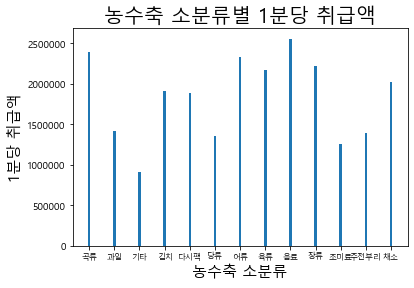

In [110]:
# 1분당 총 취급액
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 취급액', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 취급액', fontsize=15)
plt.xticks(index, label, fontsize=8)

#### 분당 취급액 합

In [111]:
x = Z.groupby('식품군').분당취급액.sum()
label = ['곡류','과일','기타','김치','다시팩','당류','어류','육류','음료','장류','조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
곡류      6.275495e+08
과일      7.253023e+07
기타      1.089350e+07
김치      5.460453e+08
다시팩     6.801875e+07
당류      1.761805e+07
어류      4.514653e+09
육류      1.783321e+09
음료      3.508111e+08
장류      1.267526e+08
조미료     7.539400e+06
주전부리    3.374891e+08
채소      5.476340e+07
Name: 분당취급액, dtype: float64

([<matplotlib.axis.XTick at 0x22742711608>,
 <a list of 13 Text xticklabel objects>)

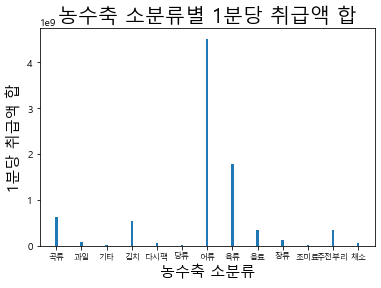

In [112]:
# 1분당 총 취급액
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 취급액 합', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 취급액 합', fontsize=15)
plt.xticks(index, label, fontsize=8)